This notebook is used to look at stars without gaia dist and see if they're any different. They are a little bit older, concentrated in the plane. Maybe Halo stars??

In [1]:
from HeaderP import *


In [26]:
lamost_dist=importage("LAMOST")
lamost_all=importage("LAMOST",dist=False)
allages=importage("ALL",dist=False)
orbit=loaddata('LAMOSTkin')

lamost_all=pd.merge(lamost_all,allages[['age','l','b']],left_on='age',right_on='age',how='inner')
lamost_dist=pd.merge(lamost_dist,allages[['age','l','b']],left_on='age',right_on='age',how='inner')
lamost_orbit=pd.merge(orbit,lamost_dist[['source_id_1','age','l','b','r_med_geo']],
                      left_on='source_id',right_on='source_id_1',how='inner')


In [27]:
lamost_nodist=lamost_all.loc[~lamost_all['sobid'].isin(lamost_dist['sobid'])]
lamost_all['dist']=lamost_all['sobid'].isin(lamost_dist['sobid'])

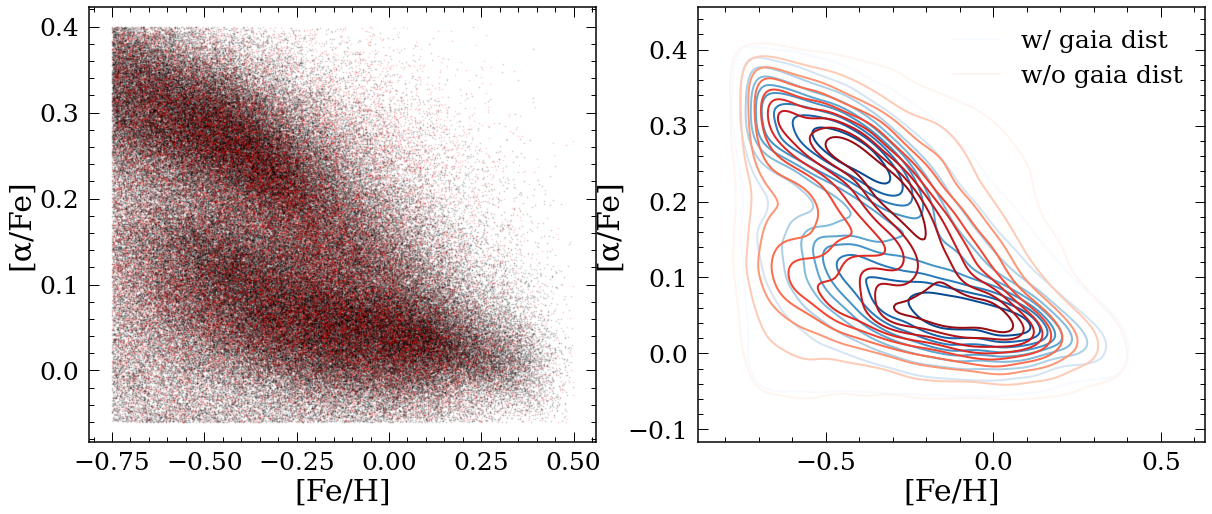

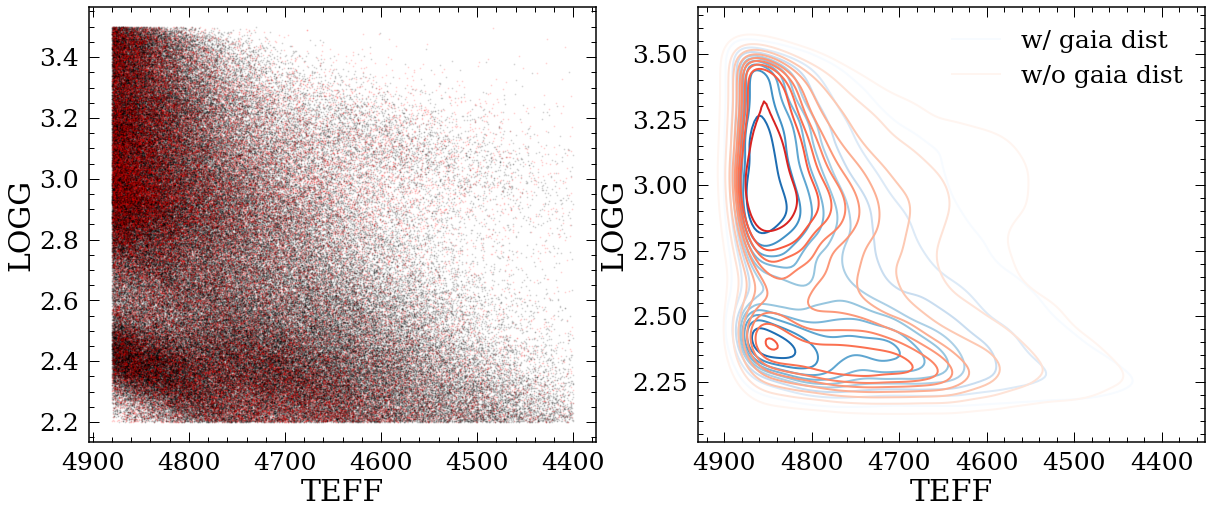

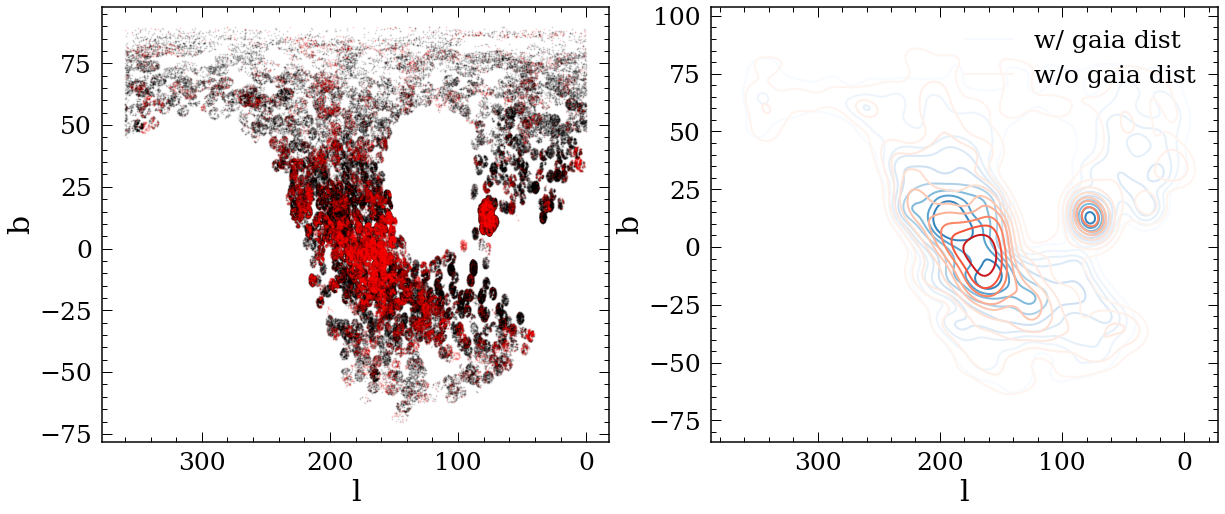

In [28]:
import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(lamost_dist['feh'], lamost_dist['mg_fe'],c='k',alpha=0.1,s=1)
plt.scatter(lamost_nodist['feh'], lamost_nodist['mg_fe'],c='r',alpha=0.1,s=1)
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
# plot contour
plt.subplot(1,2,2)
sns.kdeplot(x=lamost_dist['feh'], y=lamost_dist['mg_fe'],cmap='Blues',label='w/ gaia dist')
sns.kdeplot(x=lamost_nodist['feh'], y=lamost_nodist['mg_fe'],cmap='Reds',label='w/o gaia dist')
plt.xlabel('[Fe/H]')
plt.ylabel('[α/Fe]')
plt.legend()



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(lamost_dist['teff'], lamost_dist['logg'],c='k',alpha=0.1,s=1)
plt.scatter(lamost_nodist['teff'], lamost_nodist['logg'],c='r',alpha=0.1,s=1)
plt.gca().invert_xaxis()
plt.xlabel('TEFF')
plt.ylabel('LOGG')
# plot contour
plt.subplot(1,2,2)
sns.kdeplot(x=lamost_dist['teff'], y=lamost_dist['logg'],cmap='Blues',label='w/ gaia dist')
sns.kdeplot(x=lamost_nodist['teff'], y=lamost_nodist['logg'],cmap='Reds',label='w/o gaia dist')
plt.gca().invert_xaxis()
plt.xlabel('TEFF')
plt.ylabel('LOGG')
plt.legend()



plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(lamost_dist['l'], lamost_dist['b'],c='k',alpha=0.1,s=1)
plt.scatter(lamost_nodist['l'], lamost_nodist['b'],c='r',alpha=0.1,s=1)
plt.gca().invert_xaxis()
plt.xlabel('l')
plt.ylabel('b')
# plot contour
plt.subplot(1,2,2)
sns.kdeplot(x=lamost_dist['l'], y=lamost_dist['b'],cmap='Blues',label='w/ gaia dist')
sns.kdeplot(x=lamost_nodist['l'], y=lamost_nodist['b'],cmap='Reds',label='w/o gaia dist')
plt.gca().invert_xaxis()
plt.xlabel('l')
plt.ylabel('b')
plt.legend()

look at their age histogram

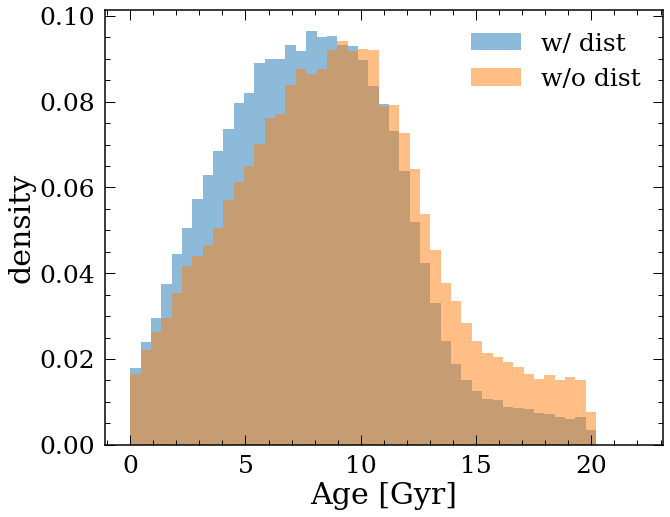

In [29]:
plt.figure(figsize=(10,8))
plt.hist(lamost_dist['age'],bins=np.linspace(0,22,50),alpha=0.5,density=True,label='w/ dist');
plt.hist(lamost_nodist['age'],bins=np.linspace(0,22,50),alpha=0.5,density=True,label='w/o dist');
plt.xlabel('Age [Gyr]')
plt.ylabel('density')
plt.legend()

See if we can classify these two kinds of ages


In [30]:
import Astraea

In [31]:
regr, regr_outs = Astraea.RFclassifier(lamost_all, [i for i in lamost_all.columns if (('dist' not in i) and ('err' not in i) and ('sobid' not in i) and ('KID' not in i))],
                                      target_var='dist')


Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 11
Features attempt to train: ['feh', 'teff', 'logg', 'mg_fe', 'Dp', 'Dnu', 'age', 'chisq', 'SNR', 'l', 'b']
ID column not found, using index as ID!
258147 stars in dataframe!
258147 total stars used for RF!
206517 training stars!
Finished training! Making predictions!
Finished predicting!
Finished!


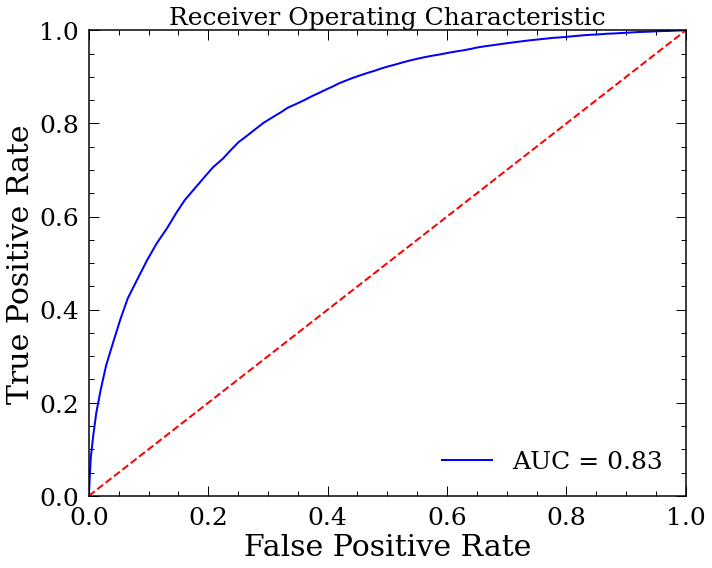

In [32]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# predict the probability for testing set using the trained model
probs = regr.predict_proba(regr_outs.X_test)
preds = probs[:,1]

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(regr_outs.y_test, preds)

# get the accuracy
roc_auc = metrics.auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic',fontsize=25)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.savefig('ROC.png')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/Astraea-0.1.0-py3.8.egg/Astraea/Astraea.py:783: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(y_test,prediction,'r.',Markersize=MS,alpha=0.2)


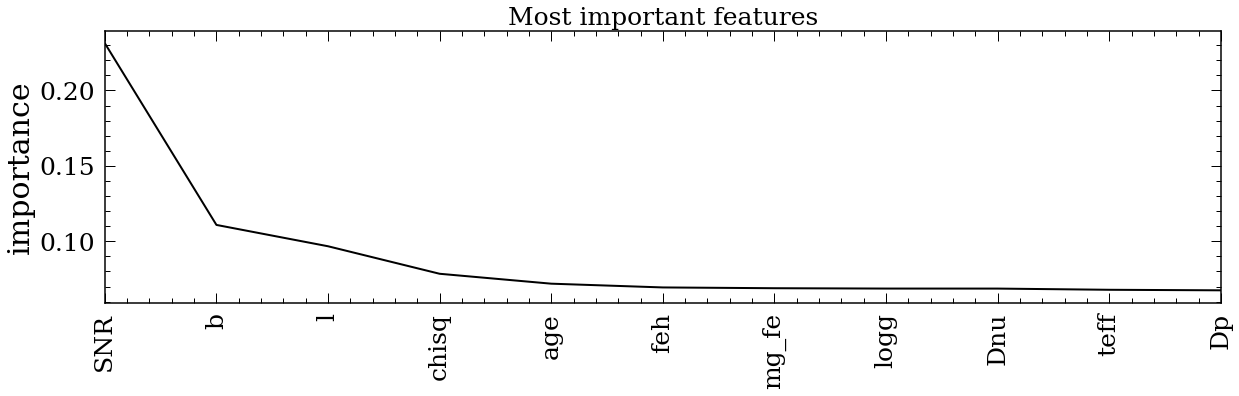

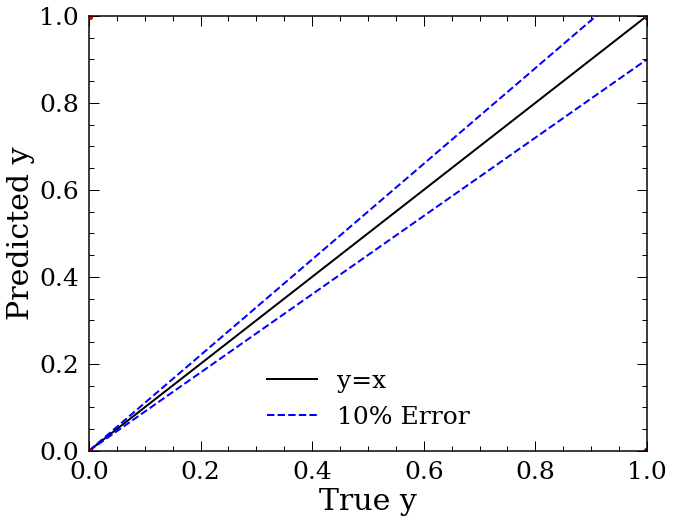

In [69]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='y', MS=10)